In [1]:
import os
import glob
import numpy as np
from numpy import pi

In [2]:
from qiskit import *
from qiskit.tools.visualization import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

In [3]:
from qiskit.providers.aer import Aer

In [4]:
import kaleidoscope.qiskit
from kaleidoscope import qsphere

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')

circuits = []
for i in range(0, 6):
    circuits.append(QuantumCircuit(qreg_q, creg_c))

In [7]:
inits = []

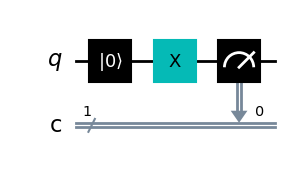

In [8]:
circuits[0].reset(qreg_q[0])
inits.append(circuits[0].copy())
circuits[0].x(qreg_q[0])
circuits[0].measure(qreg_q[0], creg_c[0])
circuits[0].draw(output="mpl")

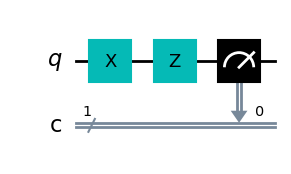

In [9]:
circuits[1].x(qreg_q[0])
inits.append(circuits[1].copy())
circuits[1].z(qreg_q[0])
circuits[1].measure(qreg_q[0], creg_c[0])
circuits[1].draw(output='mpl')

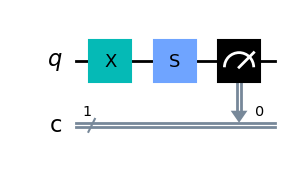

In [10]:
circuits[2].x(qreg_q[0])
inits.append(circuits[2].copy())
circuits[2].s(qreg_q[0])
circuits[2].measure(qreg_q[0], creg_c[0])
circuits[2].draw(output='mpl')

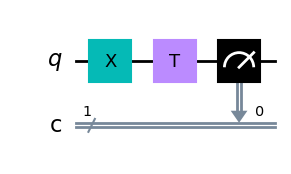

In [11]:
circuits[3].x(qreg_q[0])
inits.append(circuits[3].copy())
circuits[3].t(qreg_q[0])
circuits[3].measure(qreg_q[0], creg_c[0])
circuits[3].draw(output='mpl')

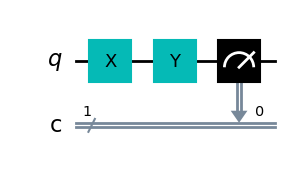

In [12]:
circuits[4].x(qreg_q[0])
inits.append(circuits[4].copy())
circuits[4].y(qreg_q[0])
circuits[4].measure(qreg_q[0], creg_c[0])
circuits[4].draw(output='mpl')

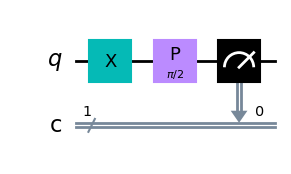

In [13]:
circuits[5].x(qreg_q[0])
inits.append(circuits[5].copy())
circuits[5].p(np.pi/2, qreg_q[0])
circuits[5].measure(qreg_q[0], creg_c[0])
circuits[5].draw(output='mpl')

In [14]:
simulator_aer = Aer.get_backend("aer_simulator")

In [15]:
statevector_init = []
statevector_circ = []

In [16]:
for i in range(0, 6):
    inits[i].save_statevector()
    statevector_init.append(simulator_aer.run(inits[i]).result().get_statevector())
    
    circuits[i].save_statevector()
    statevector_circ.append(simulator_aer.run(circuits[i]).result().get_statevector())

In [17]:
archive_path = os.path.abspath('')
os.chdir(archive_path)

In [18]:
for index in range(0, len(statevector_init)):
    initial_figure = qsphere(statevector_init[index])
    initial_figure.savefig("images/bloch_init" + str(index) + ".png")

In [19]:
for index in range(0, len(statevector_circ)):
    final_figure = qsphere(statevector_circ[index])
    final_figure.savefig("images/bloch_final" + str(index) + ".png")